In [133]:
import pandas as pd
import numpy as np
import calendar

In [134]:
store_calendar = pd.read_csv("calendar_afcs2021.csv", index_col=0)
date_converter = dict(zip(store_calendar['d'], store_calendar.index))

sell_prices = pd.read_csv("sell_prices_afcs2021.csv", index_col=0)

sample_submission = pd.read_csv("sample_submission_afcs2021.csv", index_col=0)

train_data = pd.read_csv("sales_train_validation_afcs2021.csv", index_col=0)
test_data = pd.read_csv("sales_test_validation_afcs2021.csv", index_col=0)
train_data = train_data.rename(columns=date_converter)
test_data = test_data.rename(columns=date_converter)

total_sales = train_data.sum()


# What does the data look like?

In [32]:
train_data

,1/29/2011,1/30/2011,1/31/2011,2/1/2011,2/2/2011,2/3/2011,2/4/2011,2/5/2011,2/6/2011,2/7/2011,...,4/15/2016,4/16/2016,4/17/2016,4/18/2016,4/19/2016,4/20/2016,4/21/2016,4/22/2016,4/23/2016,4/24/2016
id,,,,,,,,,,,,,,,,,,,,,
FOODS_3_001_TX_3_validation,0,2,1,3,0,0,1,0,2,1,...,0,0,0,0,2,0,0,5,2,0
FOODS_3_002_TX_3_validation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FOODS_3_003_TX_3_validation,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
FOODS_3_004_TX_3_validation,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
FOODS_3_005_TX_3_validation,0,1,1,0,0,1,2,0,0,1,...,0,4,2,1,1,0,1,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FOODS_3_823_TX_3_validation,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,2,0,2
FOODS_3_824_TX_3_validation,0,1,0,1,0,2,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
FOODS_3_825_TX_3_validation,0,0,0,2,1,1,0,0,1,1,...,1,1,1,3,1,0,0,4,2,0


In [5]:
desc = train_data.transpose().describe()
desc

id,FOODS_3_001_TX_3_validation,FOODS_3_002_TX_3_validation,FOODS_3_003_TX_3_validation,FOODS_3_004_TX_3_validation,FOODS_3_005_TX_3_validation,FOODS_3_006_TX_3_validation,FOODS_3_007_TX_3_validation,FOODS_3_008_TX_3_validation,FOODS_3_009_TX_3_validation,FOODS_3_010_TX_3_validation,...,FOODS_3_818_TX_3_validation,FOODS_3_819_TX_3_validation,FOODS_3_820_TX_3_validation,FOODS_3_821_TX_3_validation,FOODS_3_822_TX_3_validation,FOODS_3_823_TX_3_validation,FOODS_3_824_TX_3_validation,FOODS_3_825_TX_3_validation,FOODS_3_826_TX_3_validation,FOODS_3_827_TX_3_validation
count,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,...,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000
mean,0.327757,0.729744,0.118139,0.084684,0.762676,0.364349,6.086252,1.254051,0.175640,0.289597,...,1.460010,1.259279,1.291688,0.295348,2.654992,0.207005,0.219028,0.627810,0.590695,0.344485
std,0.726622,1.359393,0.468294,0.348548,1.042069,0.817899,10.340611,4.594916,0.589742,0.651504,...,1.642975,1.728030,1.348957,0.682311,3.985086,0.513432,0.596024,0.990805,1.034073,1.263418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,8.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,8.000000,9.000000,6.000000,4.000000,8.000000,7.000000,122.000000,70.000000,7.000000,4.000000,...,11.000000,13.000000,9.000000,4.000000,38.000000,4.000000,6.000000,8.000000,8.000000,22.000000


In [6]:
desc.loc['max'].idxmax()

'FOODS_3_547_TX_3_validation'

# Total sales

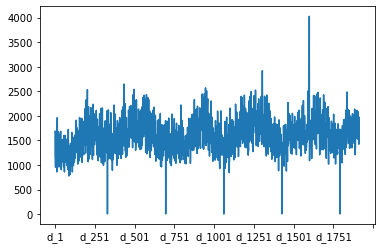

In [10]:
total_sales.plot()

We see some days where the total sales are almost zero, and one very high peak. Lets explore that.

In [33]:
very_low_days = total_sales[total_sales < 100].index
print(very_low_days)

Index(['12/25/2011', '12/25/2012', '12/25/2013', '12/25/2014', '12/25/2015'], dtype='object')


Ah, so the store seems to be closed on chistmas day (25th of december)

In [34]:
very_high_day = total_sales[total_sales > 3000].index
print(very_high_day)

Index(['6/15/2015'], dtype='object')


In [42]:
calendar[calendar.index == very_high_day[0]]

,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA
date,,,,,,,,,,,
6/15/2015,11520,Monday,3,6,2015,d_1599,NaN,NaN,NaN,NaN,0


Hmmm, it wasnt a really special day it seems. Maybe there was a massive sale or something like that? We'll look at that some other time

# What are some special days in the year?

Lets split the data set by year

In [81]:
ts_total_sales = pd.DataFrame({'values': total_sales.values}, index=pd.DatetimeIndex(total_sales.index))
ts_total_sales

,values
2011-01-29,1686
2011-01-30,1661
2011-01-31,1189
2011-02-01,1137
2011-02-02,954
...,...
2016-04-20,1526
2016-04-21,1423
2016-04-22,1664
2016-04-23,1974


In [147]:
total_sales_by_year = dict()
for year in range(2011, 2016):
    total_sales_by_year[year] = ts_total_sales[ts_total_sales.index.year == year]

In [148]:
total_sales_by_year[2015]

,values
2015-01-01,1273
2015-01-02,1427
2015-01-03,1484
2015-01-04,1795
2015-01-05,1708
...,...
2015-12-27,1114
2015-12-28,1092
2015-12-29,1191
2015-12-30,1167


In [149]:
def get_sales_by_month(df):
    total_sales_by_month = dict()
    for month in range(1, 13):
        total_sales_by_month[month] = df[df.index.month == month]
    return total_sales_by_month

def get_highest_month(sales_by_month):
    return calendar.month_abbr[np.array([sum(sales_by_month[month].values) for month in sales_by_month.keys()]).argmax() + 1]

def get_lowest_month(sales_by_month):
    return calendar.month_abbr[np.array([sum(sales_by_month[month].values) for month in sales_by_month.keys()]).argmin() + 1]

In [150]:
for year in total_sales_by_year.keys():
    sales = total_sales_by_month = get_sales_by_month(total_sales_by_year[year])
    hm = get_highest_month(total_sales_by_month)
    lm = get_lowest_month(total_sales_by_month)
    print("In the year " + str(year) + ", the highest sale month was: " + hm + ". and the lowest was: " + lm)

In the year 2011, the highest sale month was: Aug. and the lowest was: Jan
In the year 2012, the highest sale month was: Aug. and the lowest was: Nov
In the year 2013, the highest sale month was: Aug. and the lowest was: Feb
In the year 2014, the highest sale month was: Aug. and the lowest was: Dec
In the year 2015, the highest sale month was: Jul. and the lowest was: Dec
